# Team Project
### Zachariah Freitas

This is my work on the team project so far.

# Data Importing and Pre-processing
- [X] Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
- [X] Clean, wrangle, and handle missing data
- [x] Transform data appropriately using techniques such as aggregation, normalization, and feature construction
Reduce redundant data and perform need based discretization

# Data Datum
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. <br />
<br />
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
The dataset is ordered by date (from May 2008 to November 2010).

Origin: UCI Machine Learning Repository <br />
File Type: CSV <br />
File Size: 3.7 MB <br />
Modeling Problem: Classification <br />
Missing Values: Yes <br />

## Dataset variables:
   ### bank client data:
   1 - age (numeric) <br />
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") <br />
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br />
   4 - education (categorical: "unknown","secondary","primary","tertiary")<br />
   5 - default: has credit in default? (binary: "yes","no")<br />
   6 - balance: average yearly balance, in euros (numeric) <br />
   7 - housing: has housing loan? (binary: "yes","no")<br />
   8 - loan: has personal loan? (binary: "yes","no")<br />
   ### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")<br /> 
  10 - day: last contact day of the month (numeric)<br />
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br />
  12 - duration: last contact duration, in seconds (numeric)<br />
   ### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br />
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br />
  15 - previous: number of contacts performed before this campaign and for this client (numeric)<br />
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br />
  17 - deposit: has the client subscribed a term deposit? (binary: "yes","no") (dependent variable)<br />


In [205]:
# Import Libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd # How are a Zoo and a Data Scientist the same? They both import pandas!
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import missingno as mno # Helps visualize missing data

In [206]:
# Import Data
df = pd.read_csv('/Users/zfreitas/Dropbox/Classes/USD/ADS-500B-Data Science Programming/Final Team Project/Dataset 1 (Bank Marketing)/bank_marketing.csv',  sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28.0,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58.0,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43.0,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [207]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43872 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    43905 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    43828 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB
None


<AxesSubplot:>

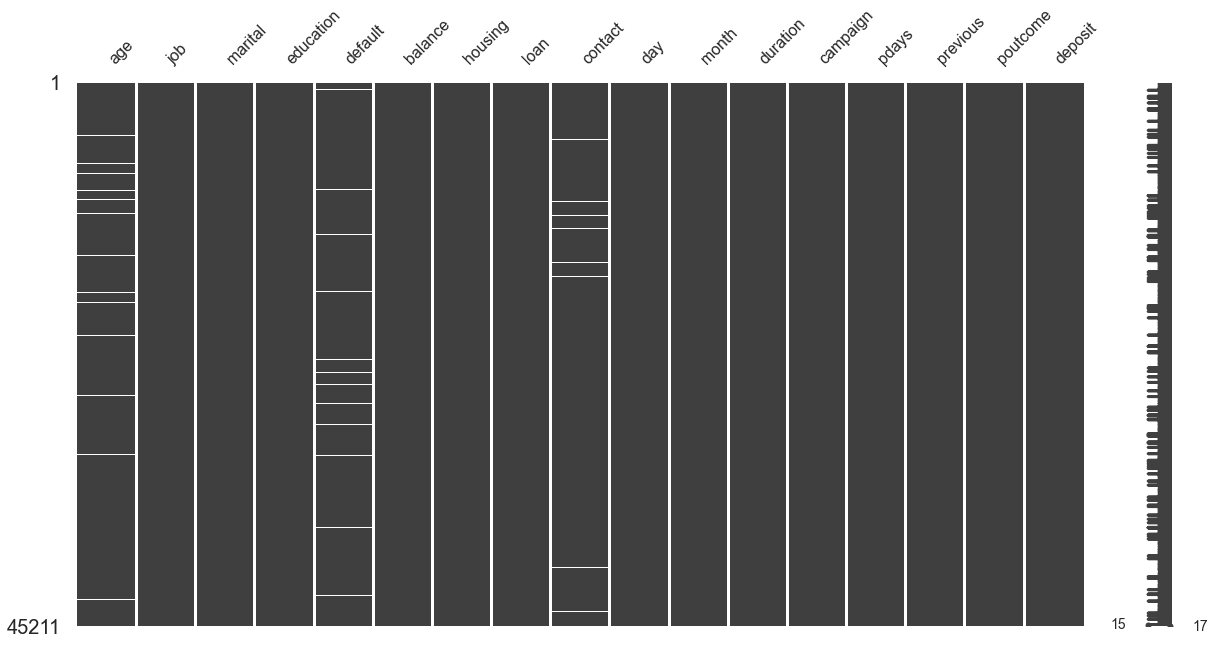

In [208]:
# Look for missing data.
mno.matrix(df, figsize = (20, 10))

# Delete missing data - So Gary has a sweet methodology

In [209]:
#Number of missing values per column.
df.isnull().sum()

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64

In [210]:
# Get counts of each value in each category feature.
print(df.groupby(['deposit']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['poutcome']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['month']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['contact']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['loan']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['housing']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['default']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['education']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['marital']).size().reset_index(name='counts'))
print('\n')
print(df.groupby(['job']).size().reset_index(name='counts'))

  deposit  counts
0      no   39922
1     yes    5289


  poutcome  counts
0  failure    4901
1    other    1840
2  success    1511
3  unknown   36959


   month  counts
0    apr    2932
1    aug    6247
2    dec     214
3    feb    2649
4    jan    1403
5    jul    6895
6    jun    5341
7    mar     477
8    may   13766
9    nov    3970
10   oct     738
11   sep     579


     contact  counts
0   cellular   28410
1  telephone    2809
2    unknown   12609


  loan  counts
0   no   37967
1  yes    7244


  housing  counts
0      no   20081
1     yes   25130


  default  counts
0      no   43113
1     yes     792


   education  counts
0    primary    6851
1  secondary   23202
2   tertiary   13301
3    unknown    1857


    marital  counts
0  divorced    5207
1   married   27214
2    single   12790


              job  counts
0          admin.    5171
1     blue-collar    9732
2    entrepreneur    1487
3       housemaid    1240
4      management    9458
5         retired    2264
6   self

# Data Analysis and Visualization
- [ ] Identify categorical, ordinal, and numerical variables within data
- [ ] Provide measures of centrality and distribution with visualizations
- [ ] Diagnose for correlations between variables and determine independent and dependent variables
- [ ] Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

## Identify categorical, ordinal, and numerical variables within data
### Categorical data:
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") <br />
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br />
4 - education (categorical: "unknown","secondary","primary","tertiary")<br />
5 - default: has credit in default? (binary: "yes","no")<br />
7 - housing: has housing loan? (binary: "yes","no")<br />
8 - loan: has personal loan? (binary: "yes","no")<br />
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")<br /> 
10 - day: last contact day of the month (numeric)<br />
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br />
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br />
17 - deposit: has the client subscribed a term deposit? (binary: "yes","no") (dependent variable)<br />
### Ordinal data:

### Numerical data:
1 - age (numeric) <br />
6 - balance: average yearly balance, in euros (numeric) <br />
12 - duration: last contact duration, in seconds (numeric / interval)<br />
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br />
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br />
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br />

In [211]:
## This program reads in the provided dataset and outputs 2 .csv files.
## One file containing an analysis of the continuous data, the other 
## containing an analysis of the categorical data

import pandas as pd
import numpy as np
import warnings


## This function takes the list of continuos features and the full data set.
## With this it selects just the continuous columns for processing
## It forms a new dataframe of appropriate size then applies the required
## calculations to these columns and places the results in the new dataframe
def processContinuous(conFeat, data):
	conHead = ['Count', 'Miss %', 'Card.', 'Min', '1st Qrt.', 'Mean', 'Median', '3rd Qrt', 'Max', 'Std. Dev.']
	
	conOutDF = pd.DataFrame(index=conFeat, columns=conHead)
	conOutDF.index.name = 'FEATURENAME'
	columns = data[conFeat]

	#COUNT
	count = columns.count()
	conOutDF[conHead[0]] = count
	
	#MISS % - no continuous features have missing data
	percents = ['']*len(conFeat)
	for col in columns:
		percents[conFeat.index(col)] = 0.00

	conOutDF[conHead[1]] = percents
	
	#CARDINALITY
	conOutDF[conHead[2]] = columns.nunique()
	
	#MINIMUM
	conOutDF[conHead[3]] = columns.min()
	
	#1ST QUARTILE
	conOutDF[conHead[4]] = columns.quantile(0.25)
	
	#MEAN
	conOutDF[conHead[5]] = round(columns.mean(), 2)
	
	#MEDIAN
	conOutDF[conHead[6]] = columns.median()
	
	#3rd QUARTILE
	conOutDF[conHead[7]] = columns.quantile(0.75)
	
	#MAX
	conOutDF[conHead[8]] = columns.max()
	
	#STANDARD DEVIATION
	conOutDF[conHead[9]] = round(columns.std(),2)
	
	return conOutDF
	
## This function takes the list of categorical features and the full data set
## It will then extract just the categorical columns for processing
## It forms a new dataframe of appropriate size then processes the data
## and stores it in the new dataframe
def processCategorical(catFeat, data):
	catHead = ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq', 'Mode %', '2nd Mode', '2nd Mode Freq', '2nd Mode %']

	catOutDF = pd.DataFrame(index=catFeat, columns=catHead)
	catOutDF.index.name = 'FEATURENAME'
	columns = data[catFeat]
	
	#COUNT
	count = columns.count()
	catOutDF[catHead[0]] = count
	
	#CARDINALITY
	catOutDF[catHead[2]] = columns.nunique()

	#preparing arrays for storing data
	amt = len(catFeat)
	missPercents = ['']*amt
	modeFreqs = ['']*amt
	modes = ['']*amt
	modes2 = ['']*amt
	modePercents = ['']*amt
	modeFreqs2 = ['']*amt
	modePercents2 = ['']*amt

	for col in columns:
		values = columns[col].value_counts()
		index = catFeat.index(col)
		
		#MISS %
		try:
			qMarksCount = values.loc[' ?']
			percent = (qMarksCount/count[index]) * 100
			missPercents[index] = round(percent, 2)
			
			#adjust cardinality to account for ? being counted as unique value
			catOutDF['Card.'][index] -= 1
		except Exception as e:
			missPercents[index] = 0.00
		
		#MODES
		mode = values.index[0]
		mode2 = values.index[1]
		modes[index] = mode
		modes2[index] = mode2
		
		#MODE FREQ
		modeCount = values.loc[mode]
		modeCount2 = values.loc[mode2]
		modeFreqs[index] = modeCount
		modeFreqs2[index] = modeCount2

		#MODE %
		miss = missPercents[index]
		
		modePer = (modeCount/(count[index]*((100-miss)/100)))*100
		modePercents[index] = round(modePer, 2)
		
		modePer2 = (modeCount2/(count[index]*((100-miss)/100)))*100
		modePercents2[index] = round(modePer2, 2)

	catOutDF[catHead[1]] = missPercents
	catOutDF[catHead[3]] = modes
	catOutDF[catHead[4]] = modeFreqs
	catOutDF[catHead[5]] = modePercents
	catOutDF[catHead[6]] = modes2
	catOutDF[catHead[7]] = modeFreqs2
	catOutDF[catHead[8]] = modePercents2
	
	return catOutDF

In [212]:
# EDA on continuous variables
conFeat = ['age','balance','duration', 'campaign', 'pdays', 'previous']
processContinuous(conFeat, df)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
FEATURENAME,,,,,,,,,,
age,43872,0.0,77,18.0,33.0,40.92,39.0,48.0,95.0,10.61
balance,45211,0.0,7168,-8019.0,72.0,1362.27,448.0,1428.0,102127.0,3044.77
duration,45211,0.0,1573,0.0,103.0,258.16,180.0,319.0,4918.0,257.53
campaign,45211,0.0,48,1.0,1.0,2.76,2.0,3.0,63.0,3.10
pdays,45211,0.0,559,-1.0,-1.0,40.20,-1.0,-1.0,871.0,100.13
previous,45211,0.0,41,0.0,0.0,0.58,0.0,0.0,275.0,2.30


In [213]:
conFeat.append('deposit')
df[conFeat].groupby('deposit').mean()

,age,balance,duration,campaign,pdays,previous
deposit,,,,,,
no,40.829691,1303.714969,221.182806,2.846350,36.421372,0.502154
yes,41.645609,1804.267915,537.294574,2.141047,68.702968,1.170354


In [214]:
# EDA on categorical variables
catFeat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'deposit']
processCategorical(catFeat, df)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
FEATURENAME,,,,,,,,,
job,45211,0.0,12,blue-collar,9732,21.53,management,9458,20.92
marital,45211,0.0,3,married,27214,60.19,single,12790,28.29
education,45211,0.0,4,secondary,23202,51.32,tertiary,13301,29.42
default,43905,0.0,2,no,43113,98.20,yes,792,1.80
housing,45211,0.0,2,yes,25130,55.58,no,20081,44.42
loan,45211,0.0,2,no,37967,83.98,yes,7244,16.02
contact,43828,0.0,3,cellular,28410,64.82,unknown,12609,28.77
day,45211,0.0,31,20,2752,6.09,18,2308,5.10
month,45211,0.0,12,may,13766,30.45,jul,6895,15.25


In [215]:
df['deposit_d']=pd.Series(np.where(df.deposit.values == 'yes', 1, 0), df.index)
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
job,,,,,,,,
admin.,39.302534,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.041997,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.193481,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.476466,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.428166,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.645471,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.448501,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.719763,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.546652,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


In [216]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
marital,,,,,,,,
divorced,45.745199,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
married,43.398160,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
single,33.700532,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [217]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
education,,,,,,,,
primary,45.881307,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.965556,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.550372,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.502222,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


In [218]:
df.groupby('default').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
default,,,,,,,,
no,40.947319,1390.827685,15.796048,258.888108,2.756338,40.643425,0.586343,0.117992
yes,39.428385,-136.917929,16.396465,241.085859,3.170455,18.473485,0.268939,0.065657


In [219]:
df.groupby('housing').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
housing,,,,,,,,
no,43.140375,1596.501270,16.066929,256.700911,2.845625,26.288581,0.484787,0.167024
yes,39.159438,1175.103064,15.598249,259.331476,2.698488,51.312495,0.656665,0.077000


In [220]:
df.groupby('loan').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
loan,,,,,,,,
no,40.998346,1474.453631,15.765085,259.559275,2.750336,41.192983,0.591435,0.126557
yes,40.536425,774.309912,16.023054,250.845389,2.834622,34.982054,0.522087,0.066814


In [221]:
df.groupby('contact').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
contact,,,,,,,,
cellular,40.395535,1402.469729,15.945829,262.906371,2.691482,56.972017,0.805843,0.149419
telephone,47.725806,1812.229263,16.578142,232.929512,3.385190,45.758633,0.815237,0.133143
unknown,40.601209,1174.541994,15.346181,252.361805,2.789278,1.257911,0.021572,0.040844


In [222]:
df.groupby('day').mean()

,age,balance,duration,campaign,pdays,previous,deposit_d
day,,,,,,,
1,43.181529,2111.295031,281.161491,1.605590,68.043478,1.136646,0.279503
2,40.276764,1345.593194,248.639598,2.193349,50.227378,0.897912,0.140758
3,40.102176,1600.035218,273.903614,2.602410,42.971270,0.721965,0.164968
4,39.731015,1312.111419,261.323875,2.222145,41.705882,0.829066,0.159170
5,41.791286,1181.300524,270.030366,2.103665,41.558115,0.646073,0.112565
6,41.317891,1318.024845,261.298137,2.363354,45.556936,0.619048,0.093685
7,40.791927,1055.524491,270.163456,2.281783,48.294441,0.500826,0.086406
8,40.606622,1057.933768,253.843648,2.180782,44.403909,0.520087,0.109121
9,40.903268,1128.821268,249.146701,2.457399,25.221653,0.454196,0.114670


In [223]:
df.groupby('month').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
month,,,,,,,,
apr,39.702419,1542.551160,17.317190,298.098909,1.955321,95.201910,1.052524,0.196794
aug,42.870003,1427.701777,16.432688,232.402113,3.927325,13.328958,0.278374,0.110133
dec,44.671569,2315.672897,14.434579,329.327103,2.196262,108.780374,1.803738,0.467290
feb,40.814800,1319.098905,6.354851,248.298226,2.382031,68.702907,1.182710,0.166478
jan,40.523564,946.783321,27.456878,268.220242,1.672131,67.898076,1.185317,0.101212
jul,41.014984,900.025526,18.694271,267.975344,3.524438,8.032342,0.129949,0.090935
jun,42.419075,1608.222243,11.399551,243.087811,3.135368,9.154465,0.197903,0.102228
mar,43.094828,2046.228512,14.134172,244.400419,2.205451,71.228512,1.188679,0.519916
may,38.883651,1034.992590,15.491138,260.922272,2.447552,52.157344,0.584992,0.067195


In [224]:
df.groupby('poutcome').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
poutcome,,,,,,,,
failure,40.793994,1465.805550,14.166701,244.185880,1.980820,241.509284,2.896552,0.126097
other,39.764871,1487.411413,14.475000,255.715217,2.461413,229.683696,4.009239,0.166848
success,43.062201,1939.301125,14.449371,316.868961,1.806089,163.259431,3.075447,0.647253
unknown,40.912589,1318.722043,16.145621,257.738332,2.921886,-0.962039,0.000460,0.091615


In [225]:
df.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous,deposit_d
deposit,,,,,,,,
no,40.829691,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154,0.0
yes,41.645609,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354,1.0


## Visualizations

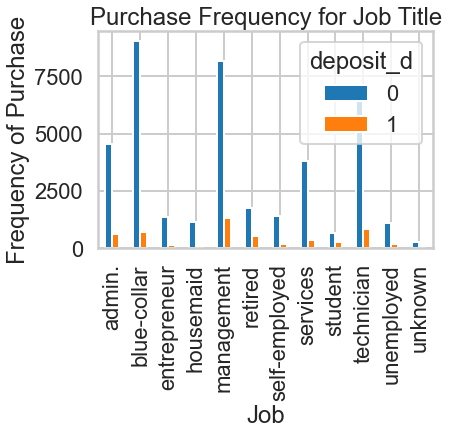

In [226]:
%matplotlib inline
import matplotlib.pyplot as plt

pd.crosstab(df.job,df.deposit_d).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

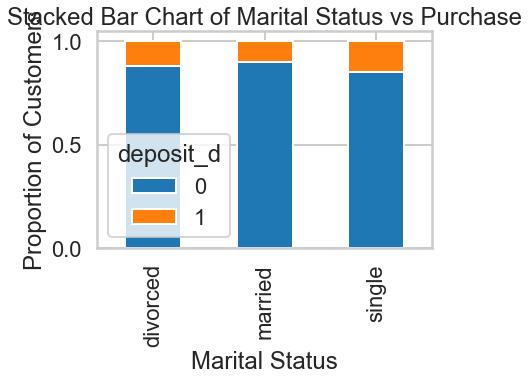

In [227]:
table=pd.crosstab(df.marital,df.deposit_d)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

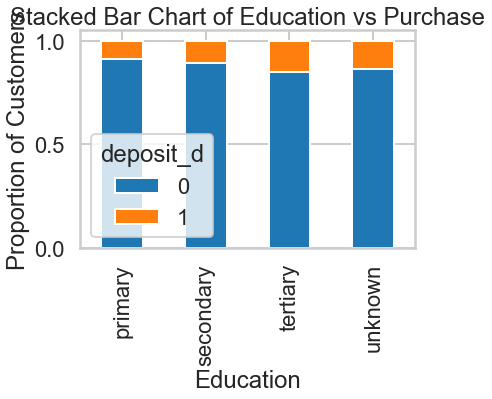

In [228]:
table=pd.crosstab(df.education,df.deposit_d)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

In [229]:
pd.crosstab(df.day_of_week,df.deposit_d).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

AttributeError: 'DataFrame' object has no attribute 'day_of_week'

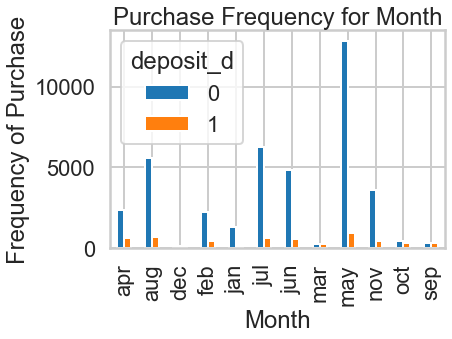

In [230]:
pd.crosstab(df.month,df.deposit_d).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.

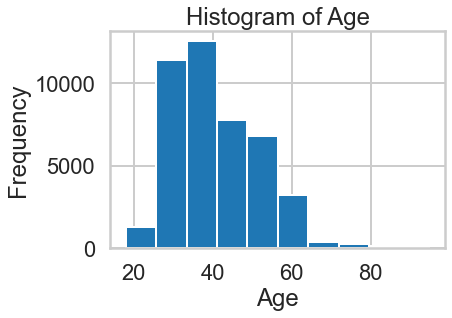

In [231]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

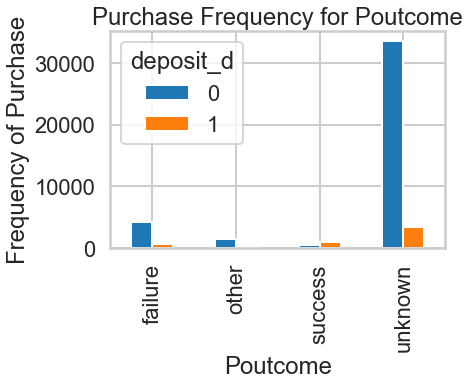

In [232]:
pd.crosstab(df.poutcome,df.deposit_d).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

In [233]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
df1 = df
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df1.join(cat_list)
    
data_vars=df1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=df1[to_keep].drop('deposit', axis=1).dropna()
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit_d', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [241]:
data_final

,age,balance,day,duration,campaign,pdays,previous,deposit_d,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44.0,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33.0,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47.0,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33.0,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71.0,1729,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72.0,5715,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57.0,668,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# Data Analytics
- [ ] Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
- [ ] Train, test, and provide accuracy and evaluation metrics for model results

In [235]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [250]:
columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']

columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_single',
       'education_primary', 'education_tertiary',
       'education_unknown', 'default_yes', 
       'housing_yes', 'loan_yes', 'contact_cellular',
       'contact_telephone',  'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success',
       'poutcome_unknown']

X = data_final.loc[:, data_final.columns != 'deposit_d']
#X = X[columns]
y = data_final.loc[:, data_final.columns == 'deposit_d']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['deposit_d'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['deposit_d']==0]))
print("Number of subscription",len(os_data_y[os_data_y['deposit_d']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['deposit_d']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['deposit_d']==1])/len(os_data_X))

length of oversampled data is  54286
Number of no subscription in oversampled data 27143
Number of subscription 27143
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

C:\Users\zfreitas\Miniconda3\envs\ADS500B\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\zfreitas\Miniconda3\envs\ADS500B\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [252]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.159680
         Iterations 10
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.770     
Dependent Variable:  deposit_d         AIC:               17438.8134
Date:                2021-08-08 18:00  BIC:               17892.8165
No. Observations:    54286             Log-Likelihood:    -8668.4   
Df Model:            50                LL-Null:           -37628.   
Df Residuals:        54235             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      10.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age                  0.0456   0.0022  20.8827 0.0000  0.0413  0.0499
balance              0.0000

In [253]:
# Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [254]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
correct = confusion_matrix[0,0] + confusion_matrix[1,1]
incorrect = confusion_matrix[0,1] + confusion_matrix[1,0]
print("The result is telling us that we have",confusion_matrix[0,0],"+",confusion_matrix[1,1],"=",correct,
      "correct predictions and", confusion_matrix[0,1],"+",confusion_matrix[1,0],"=",incorrect,"incorrect predictions.")

[[11332   284]
 [  997   549]]
The result is telling us that we have 11332 + 549 = 11881 correct predictions and 284 + 997 = 1281 incorrect predictions.


In [255]:
# Classification Report - Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11616
           1       0.66      0.36      0.46      1546

    accuracy                           0.90     13162
   macro avg       0.79      0.67      0.70     13162
weighted avg       0.89      0.90      0.89     13162



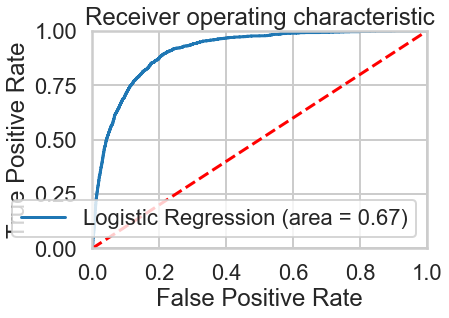

In [256]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Harvard Code

In [65]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 


import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols # fit logistic regression model


import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


data=np.array([[float(j) for j in e.strip().split()] for e in open("data/chall.txt")])
data

# statsmodels works nicely with pandas dataframes
dat = pd.DataFrame(data, columns = ['Temperature', 'Failure'])
logit_model = logit('Failure ~ Temperature',dat).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.2813
Time:                        16:34:58   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041       0.581      29.505
Temperature    -0.2322    

In [66]:
# calculate predicted failure probabilities for new termperatures
x = np.linspace(50, 85, 1000)
p = logit_model.params
eta = p['Intercept'] + x*p['Temperature']
y = np.exp(eta)/(1 + np.exp(eta))

(-0.1, 1.1)

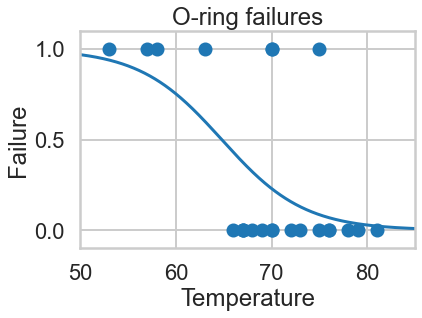

In [67]:
# plot data
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

# Presentation
- [ ] In a 5 to 10 minutes video, briefly explain the project workflow from the code and results in your markdown notebook
- [ ] State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

# Helper Functions

In [125]:
# Do Grid Search 
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    best = gs.best_estimator_
    return best

# Do Generic Classification Routine
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        print("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split  is not None:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("############# based on standard predict ################")
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    print(confusion_matrix(ytest, clf.predict(Xtest)))
    print("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [126]:
# Functions for ploting points on Roc Curves

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if mesh:
        if zfunc:
            p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
            p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z=zfunc(p0, p1)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=alpha, axes=ax)
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    ax.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

### Asymmetry
First notice that our data set is very highly asymmetric, with negatives, or clients who have not subscribed to a term deposit.  Making clients who have subscribed a term deposit only around 11-12% of the samples.

In [257]:
df1 = df.dropna()


deposit = np.where(df1['deposit'] == 'yes',1,0) 
100*deposit.mean()

11.656174334140436

This means that a classifier which predicts that EVERY customer is a negative (does not deposit) has an accuracy rate of 88-89%.

But is accuracy the correct metric?

In [167]:
admin_cost=3
offer_cost=100
clv=1000#customer lifetime value

In [168]:
conv=0.5
tnc = 0.
fpc = admin_cost+offer_cost
fnc = clv
tpc = conv*offer_cost + (1. - conv)*(clv+admin_cost)

In [169]:
cost=np.array([[tnc,fpc],[fnc, tpc]])
print(cost)

[[   0.   103. ]
 [1000.   551.5]]


In [170]:
def average_cost(y, ypred, cost):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*cost)/np.sum(c)
    return score

In [171]:
df1.shape[0]

41300

In [172]:
churntrain, churntest = train_test_split(range(df1.shape[0]), train_size=0.6)
churnmask=np.ones(df1.shape[0], dtype='int')
churnmask[churntrain]=1
churnmask[churntest]=0
churnmask = (churnmask==1)
churnmask

array([False, False,  True, ...,  True,  True,  True])

In [173]:

testchurners=df1['deposit'][~churnmask].values=='yes'

In [174]:
testsize = df1[~churnmask].shape[0]
ypred_dste = np.zeros(testsize, dtype="int")
print(confusion_matrix(testchurners, ypred_dste))

[[14646     0]
 [ 1874     0]]


In [175]:
dsteval=average_cost(testchurners, ypred_dste, cost)
dsteval

113.43825665859565

Not doing anything costs us 118.93 per customer.

In [176]:
ypred_ste = np.ones(testsize, dtype="int")
print(confusion_matrix(testchurners, ypred_ste))

[[    0 14646]
 [    0  1874]]


In [177]:
steval=average_cost(testchurners, ypred_ste, cost)
steval

153.87705811138014

Make offers to everyone costs us even more, not surprisingly. The first one is the one to beat!

In [195]:
df1[colswewant_cont]

,age,balance,duration,campaign,previous
0,58.0,2143,261,1,0
1,44.0,29,151,1,0
2,33.0,2,76,1,0
3,47.0,1506,92,1,0
5,35.0,231,139,1,0
...,...,...,...,...,...
45206,51.0,825,977,3,0
45207,71.0,1729,456,2,0
45208,72.0,5715,1127,5,3
45209,57.0,668,508,4,0


In [200]:
colswewant_cont=['age','balance','duration', 'campaign', 'previous', 'pdays']
colswewant_cat=[]

df1con = df1[colswewant_cont]
df1cat = df1[colswewant_cat]
finaldf = pd.concat([df1con, df1cat], axis=1)

In [201]:
# Let's Run this Classification Model



clflogreg = LogisticRegression(max_iter=1000)
#logreg.fit(X, os_data_y)
clfgnb, Xtrain, ytrain, Xtest, ytest=do_classify(clflogreg, None, df1, colswewant_cont, 'deposit', "yes", mask=churnmask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.89
Accuracy on test data:     0.89
[[14444   202]
 [ 1584   290]]
########################################################
